# Data Visualization and Exploration

We look at the various questions such as:
1. The Most successful movies at the Academy
2. The Biggest Surprises
3. The Biggest Dissapointments
4. The Best Movies based on aggregated information from IMDB and Academy Awards

Still to come...
1. Best comedies
2. Best romance
3. Best action

 

In [1]:
# import necessary libraries
import pandas as pd
import collections
import numpy as np
import requests
import wikipedia
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.request import urlopen
from scrapy import selector
import datetime as dt
import pickle
from skimage import io
from IPython.display import clear_output
%matplotlib inline
plt.style.use('ggplot')

# Data Visualization: The Academy Awards

In [2]:
#OSCARS information
genre_dict = pickle.load(open("my_data_4/genre_dict","rb"))
genre_dict2 = pickle.load(open("my_data_4/genre_dict2","rb"))


all_categories = pickle.load(open("my_data_4/all_categories","rb")) 
major_categories = pickle.load(open("my_data_4/major_categories","rb")) 
minor_categories = pickle.load(open("my_data_4/minor_categories","rb")) 

df_oscars_wide = pd.read_csv('my_data_4/df_oscars_wide.csv', index_col=[0])
df_oscars_long = pd.read_csv('my_data_4/df_oscars_long.csv', index_col=[0])
df_individual_long = pd.read_csv('my_data_4/df_individual_long.csv', index_col=[0])
df_oscars_wide.rename(columns = {'film':'title'},inplace=True)
df_oscars_wide.title = df_oscars_wide.title.str.replace(':','')

# Movies information
df_movies = pd.read_csv('my_data_4/df_movies.csv', index_col=[0])
df_movies_derived = pd.read_csv('my_data_4/df_movies_derived.csv', index_col=[0])
df_movies_genres = pd.read_csv('my_data_4/df_movies_genres.csv', index_col=[0])

#Oscar scores and counts
df_movies_oscars_pre_post_score = pd.read_csv('my_data_4/df_movies_oscars_pre_post_score.csv', index_col=[0])
df_movies_oscars_precount = pd.read_csv('my_data_4/df_movies_oscars_precount.csv', index_col=[0])
df_movies_oscars_postcount = pd.read_csv('my_data_4/df_movies_oscars_postcount.csv', index_col=[0])
df_movies.title = df_movies.title.str.replace(':','')

movie_dict = pickle.load(open("my_data_4/movie_dict","rb"))

# Number of Nominations

Text(0.5, 1.0, 'Best Director Category')

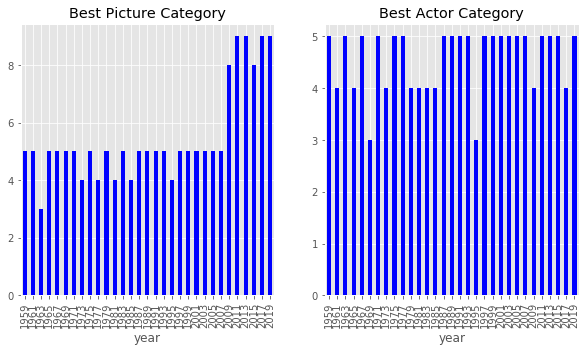

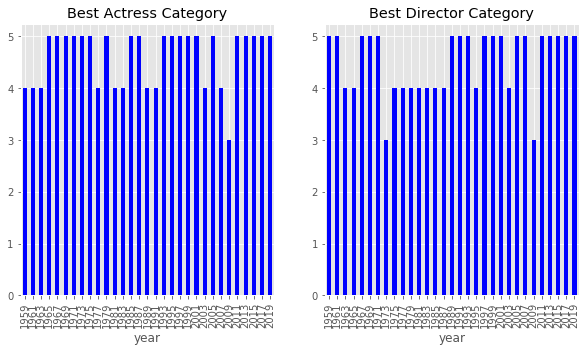

In [17]:
DF_main = pd.read_csv('my_data/df_main_FINAL.csv', index_col=[0])
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df = DF_main[DF_main.picture != 'O']
df.groupby('year').count().title[9::2].plot(kind='bar', color = 'b')
plt.title('Best Picture Category')

plt.subplot(1,2,2)
df = DF_main[DF_main.actor != 'O']
df.groupby('year').count().title[9::2].plot(kind='bar', color = 'b')
plt.title('Best Actor Category')

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df = DF_main[DF_main.actress != 'O']
df.groupby('year').count().title[9::2].plot(kind='bar', color = 'b')
plt.title('Best Actress Category')

plt.subplot(1,2,2)
df = DF_main[DF_main.director != 'O']
df.groupby('year').count().title[9::2].plot(kind='bar', color = 'b')
plt.title('Best Director Category')



# What Genre do audiences love the most?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 2369 to 13955
Data columns (total 2 columns):
imdb_rating    960 non-null float64
genre          960 non-null object
dtypes: float64(1), object(1)
memory usage: 22.5+ KB


Text(0.5, 1.0, 'IMDB Ratings for Various Genres')

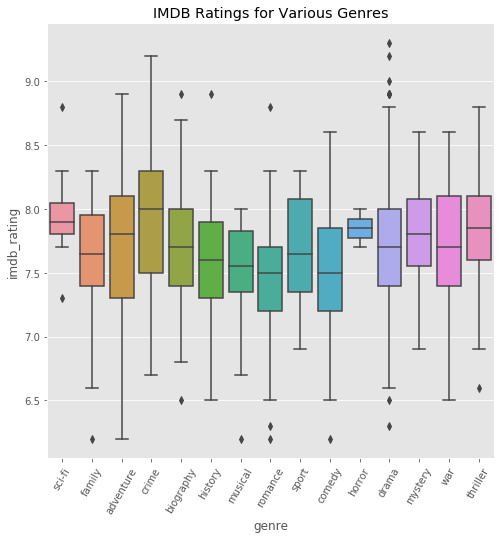

In [19]:
# IMDB Ratings
genres = ['sci-fi', 'family', 'adventure', 'crime', 
                'biography', 'history', 'musical', 'romance', 'sport', 'comedy', 
                'horror', 'drama', 'mystery', 'war', 'thriller']
df = DF_main[DF_main.picture != 'O']
DF = pd.DataFrame()

for g in genres:
    temp = df[df[g]==1][['imdb_rating']]
    temp['genre'] = g
    DF = DF.append(temp)

DF.info()
set(DF.genre.values)

plt.figure(figsize = (8,8))
ax = sns.boxplot(x="genre", y="imdb_rating", data=DF)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.title('IMDB Ratings for Various Genres')

In [ ]:
# Do Oscar-winning films tend to have better ratings than just nominated films?

# The most popular genres for the Best Picture Award

/Users/ranitsengupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


Text(0, 0.5, 'Genres')

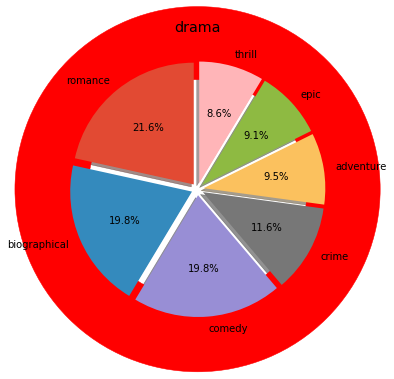

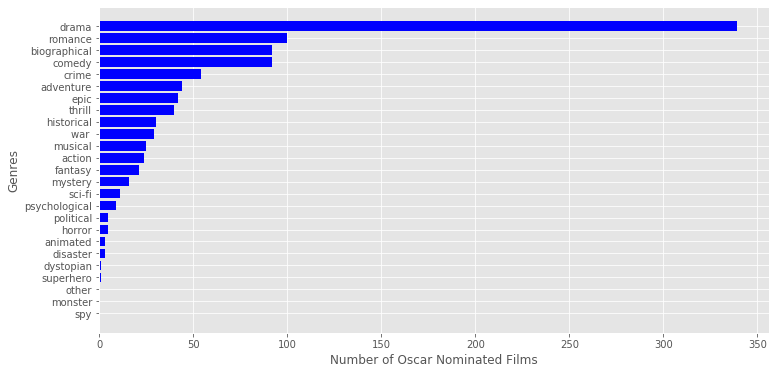

In [3]:
df = df_oscars_long
df = df[(df.category == 'picture')&(df.result != 'O')]
_genres = []
for genre in genre_dict:
    gen = genre_dict[genre]
    if gen not in _genres:
        _genres.append(gen)
_genres.append('other')
# print(_genres)
_genres_count = np.zeros(len(_genres))

for row in df.iterrows():
    idx = row[0]
    title = row[1].title
    year = row[1].year
    if (title,year) not in movie_dict:
        continue
    if 'genre' not in movie_dict[title,year]:
        continue
    all_genres = movie_dict[title,year]['genre']
    for genre in all_genres:
        
        if genre == 'other' or genre == 'oth':
            continue
        _genres_count[_genres.index(genre)]+=1


# df_gen_count = pd.DataFrame({'genres': _genres, 'nums': _genres_count})
df_gen_count = pd.DataFrame({'genres':_genres, "nums":_genres_count}).sort_values(by = 'nums', ascending=True)
df_gen_count['genres'] = df_gen_count['genres'].apply(lambda x:genre_dict2[x])

N = 8
df = df_gen_count.sort_values(by = 'nums', ascending=False)
df = df.iloc[range(N),:]
explode = np.zeros(len(df))
explode[0] = 0.05
# plt.figure(figsize=(12,6))
# ax1=plt.subplot(1, 2, 1)
# _ = plt.pie(df['nums'], labels = df['genres'],explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
# plt.title('With Drama')

plt.figure(figsize=(12,6))
df = df.iloc[range(1,N),:]
explode = np.ones(len(df))*0.05
ax2=plt.subplot(1, 2, 2)
plt.pie(1, radius=1.5, colors= 'r', wedgeprops=dict(width=0.6, edgecolor='r'))
plt.pie(df['nums'], labels = df['genres'],explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('drama')
     
plt.figure(figsize=(12,6))
_ = plt.barh(df_gen_count['genres'], df_gen_count['nums'], color ='b')
plt.xlabel('Number of Oscar Nominated Films')
plt.ylabel('Genres')

# The List of Winners and Losers

1. The most successful movies at the Academy of all time
2. The biggest surprises of all time - the underdog winners
3. The biggest dissapointments
4. The best films according to Academy and IMDB
5. When the Academy disagreed with the public


In [4]:
def plot_n_sort(df, topN, size_factor = 3, fontsize=14, figsize = (10,10)):
    x = df.sort_values(by = 'result', ascending=False).head(topN)
    x = x.merge(df_movies[['title','year', 'box_office', 'box_office_adjusted']], on=['title','year'],how='left')
    x.reset_index(inplace=True, drop=True)
    x = x.iloc[::-1]
    rank_str = [str(z) for z in len(x) - np.arange(len(x))]
    plt.figure(figsize=figsize)
    plt.scatter(x.result, range(len(x)),  s = size_factor*x.box_office, c ='b', alpha = 0.6)
    plt.xlabel('SCORE', fontsize = fontsize)
    plt.ylabel('RANK', fontsize = fontsize)
    plt.xlim([50,250])
    
    plt.yticks(range(len(rank_str)), rank_str, fontsize = fontsize)
    for i,(z1,z2) in enumerate(zip(x.result, x.title)):
        plt.annotate(z2, xy=(z1,i), xytext=(z1+10, i), fontsize = 15) #  arrowprops={'color':'red'})
    return x

## Best in the various Genres

### Best Comedies

In [5]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')

,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,one flew over the cuckoo's nest,1975,25.2,8.7,219.24,163.25,303.438662
1,forrest gump,1994,20.2,8.8,177.76,678.20,457.624831
2,terms of endearment,1983,23.0,7.4,170.20,108.40,108.835341
3,rain man,1988,20.0,8.0,160.00,354.80,299.915469
4,shakespeare in love,1998,20.4,7.1,144.84,289.30,177.484663


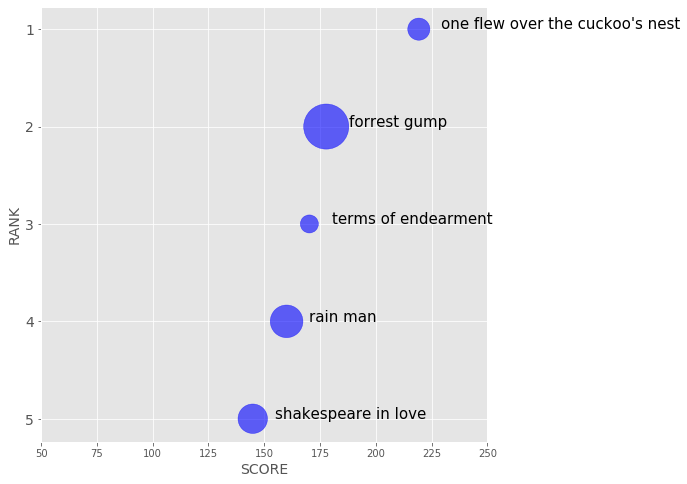

In [6]:
df2 = df[df.com == 1]
df2 = df2[df2.year>=1960]
df2 = df2[['title','year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(5)
x = plot_n_sort(df2, 5, size_factor = 3, fontsize=14, figsize = (8,8))
x.sort_values(by = 'result', ascending=False).head(5)


### Best Romance

,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,forrest gump,1994,20.20,8.8,177.760,678.20,457.624831
1,shakespeare in love,1998,20.40,7.1,144.840,289.30,177.484663
2,west side story,1961,19.20,7.5,144.000,44.10,147.491639
3,the artist,2011,15.35,7.9,121.265,133.40,59.304967
4,slumdog millionaire,2008,15.00,8.0,120.000,377.89,175.515436


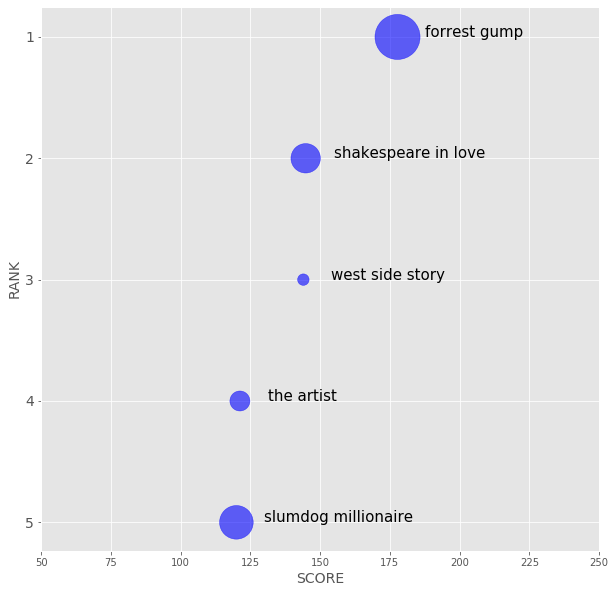

In [7]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')
df2 = df[df.rom == 1]
df2 = df2[df2.year>=1960]
df2 = df2[['title', 'year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, 5, size_factor = 3, fontsize=14, figsize = (10,10))
x.sort_values(by = 'result', ascending=False).head(5)



### Best Biographical Films

,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,the king's speech,2010,20.45,8.0,163.60,414.2,189.951205
1,gandhi,1982,20.00,8.0,160.00,127.8,132.435233
2,amadeus,1984,19.00,8.3,157.70,52.0,50.048123
3,a beautiful mind,2001,19.20,8.2,157.44,313.0,176.736307
4,a man for all seasons,1966,20.40,7.7,157.08,28.4,87.654321


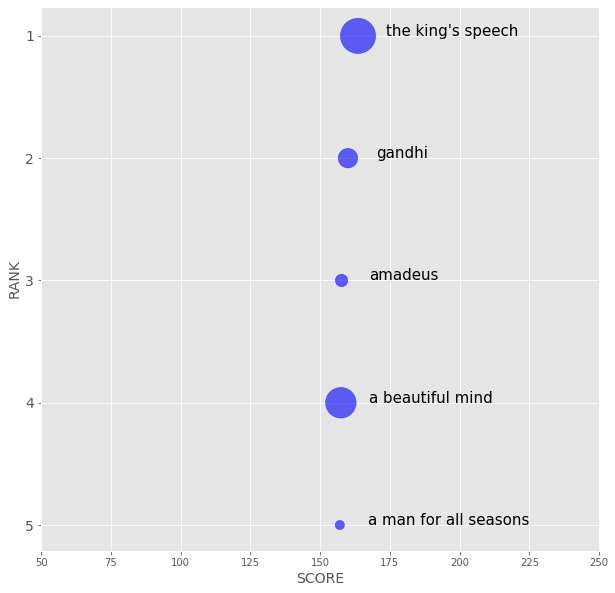

In [8]:
df2 = df[(df.bio == 1)]
df2 = df2[df2.year>=1960]
df2 = df2[['title','year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, 5, size_factor = 3, fontsize=14, figsize = (10,10))
x.sort_values(by = 'result', ascending=False).head(5)


In [9]:
df.columns

Index(['Unnamed: 0', 'imdbID', 'title', 'year', 'n_votes', 'imdb_rating',
       'budget', 'box_office', 'cast', 'genre', 'running_time',
       'inflation_factor', 'budget_adjusted', 'budget_per_actor',
       'budget_per_time', 'runtime_per_actor', 'percent_revenue',
       'total_ratings', 'book', 'sup', 'hor', 'com', 'spy', 'his', 'war',
       'psy', 'rom', 'mon', 'fan', 'mus', 'pol', 'bio', 'sci', 'act', 'dra',
       'dis', 'adv', 'mys', 'thr', 'dys', 'cri', 'epi', 'oth', 'ani',
       'based_on_book', 'other', 'prescore', 'postscore', 'precount_wins',
       'precount_noms', 'win', 'nom', 'none'],
      dtype='object')

### Best Crime Dramas

,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,the silence of the lambs,1991,24.000000,8.6,206.400,272.7,200.220264
1,no country for old men,2007,20.000000,8.1,162.000,171.6,82.778582
2,on the waterfront,1954,19.333333,8.1,156.600,9.6,35.687732
3,the french connection,1971,20.250000,7.7,155.925,51.7,127.654321
4,west side story,1961,19.200000,7.5,144.000,44.1,147.491639


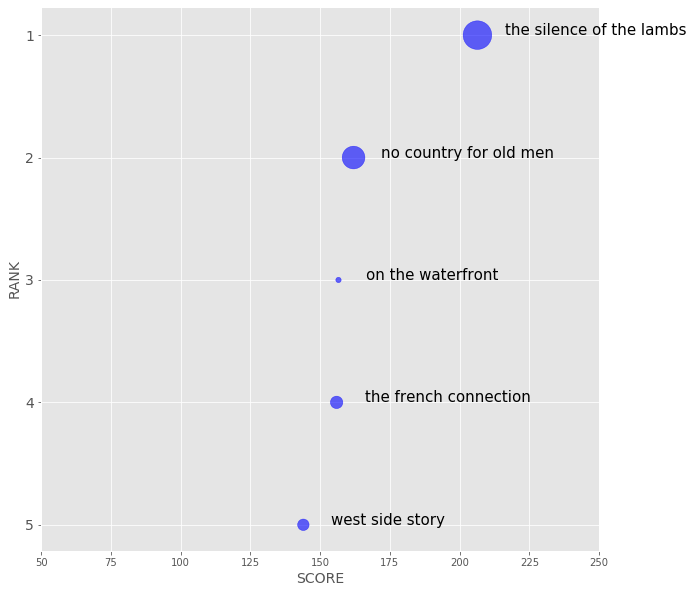

In [10]:
df2 = df[(df.cri == 1)]
df2 = df2[['title', 'year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, 5, size_factor = 3, fontsize=14, figsize = (10,10))
x.sort_values(by = 'result', ascending=False).head(5)


### Best Adventures Films

,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,ben-hur,1959,19.2,8.1,155.52,146.9,504.810997
1,the lord of the rings: the return of the king,2003,15.0,8.9,133.50,NaN,NaN
2,dances with wolves,1990,15.6,8.0,124.80,424.2,324.560061
3,gladiator,1992,10.5,8.5,89.25,NaN,NaN
4,lawrence of arabia,1962,10.6,8.3,87.98,70.0,231.788079


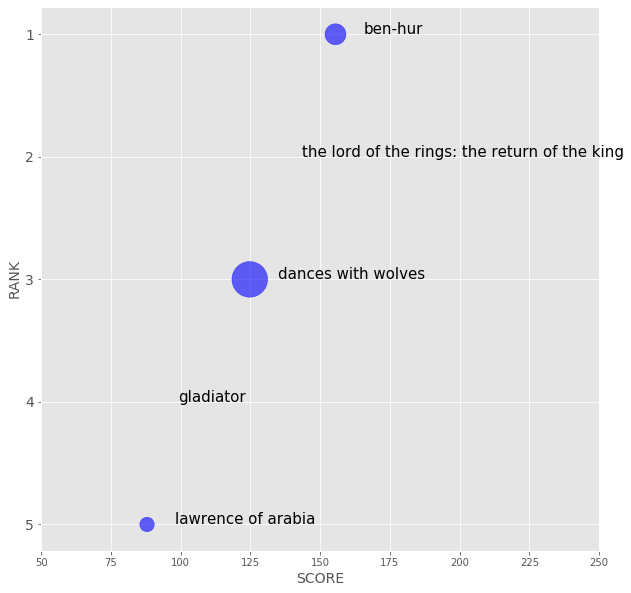

In [11]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')
df2 = df[(df.adv == 1)]
df2 = df2[['title', 'year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, 5, size_factor = 3, fontsize=14, figsize = (10,10))
x.sort_values(by = 'result', ascending=False).head(5)


### Best Epic Films

,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,gandhi,1982,20.0,8.0,160.00,127.8,132.435233
1,amadeus,1984,19.0,8.3,157.70,52.0,50.048123
2,ben-hur,1959,19.2,8.1,155.52,146.9,504.810997
3,the lord of the rings: the return of the king,2003,15.0,8.9,133.50,NaN,NaN
4,the deer hunter,1978,15.5,8.1,125.55,49.0,75.153374


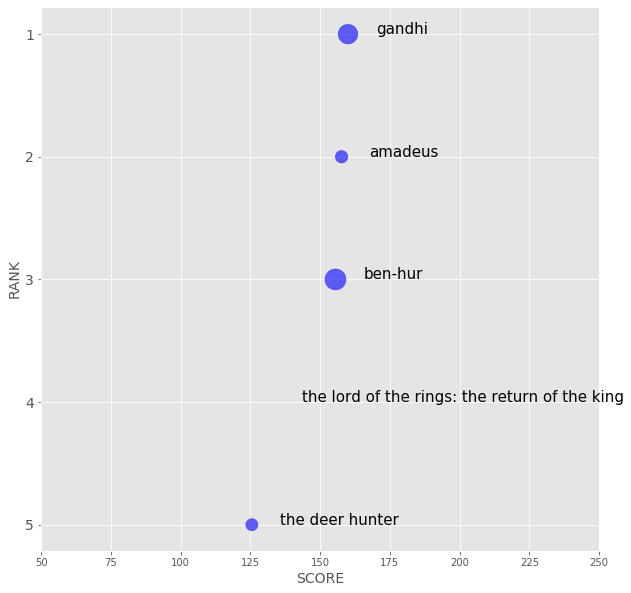

In [12]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')
df2 = df[(df.epi == 1)]
df2 = df2[['title','year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, 5, size_factor = 3, fontsize=14, figsize = (10,10))
x.sort_values(by = 'result', ascending=False).head(5)


### Best biographical films

,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,the king's speech,2010,20.45,8.0,163.60,414.2,189.951205
1,gandhi,1982,20.00,8.0,160.00,127.8,132.435233
2,amadeus,1984,19.00,8.3,157.70,52.0,50.048123
3,a beautiful mind,2001,19.20,8.2,157.44,313.0,176.736307
4,a man for all seasons,1966,20.40,7.7,157.08,28.4,87.654321


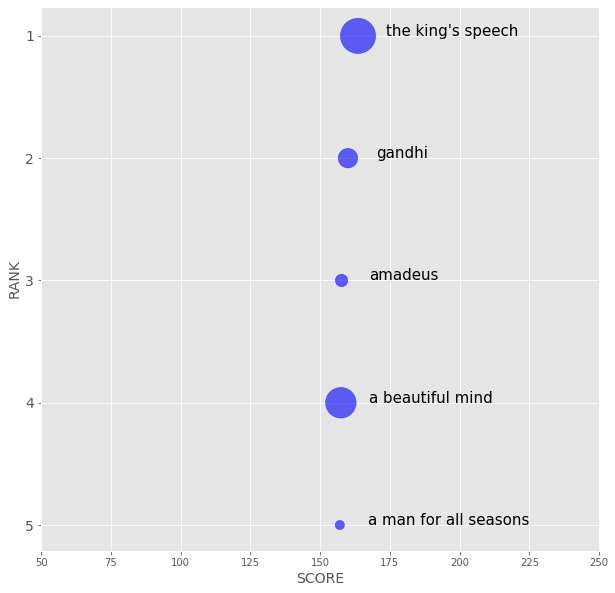

In [13]:
df2 = df[(df.bio == 1)]
df2 = df2[['title', 'year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, 5, size_factor = 3, fontsize=14, figsize = (10,10))
x.sort_values(by = 'result', ascending=False).head(5)


### Best Historical Films

,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,the king's speech,2010,20.45,8.0,163.60,414.2,189.951205
1,gandhi,1982,20.00,8.0,160.00,127.8,132.435233
2,ben-hur,1959,19.20,8.1,155.52,146.9,504.810997
3,schindler's list,1993,15.40,8.9,137.06,322.1,222.906574
4,unforgiven,1992,15.30,8.2,125.46,159.2,113.471133


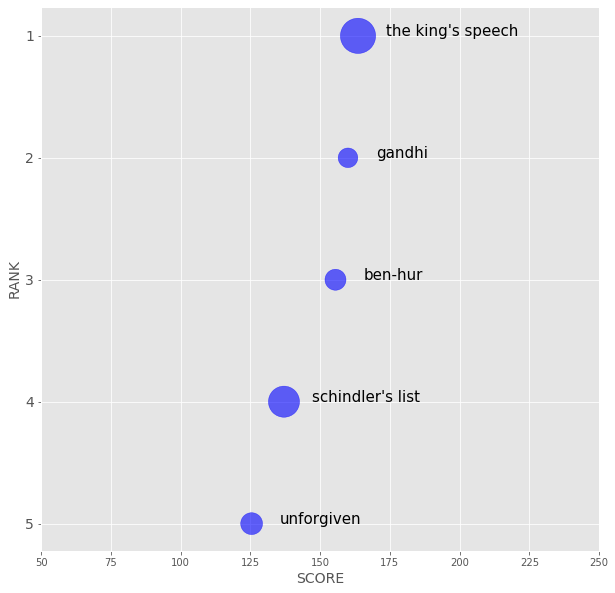

In [14]:
df2 = df[(df.his == 1)]
df2 = df2[['title', 'year','postscore','imdb_rating']]
df2 = pd.merge(df2.sort_values(by='postscore',ascending=False).head(500),df2.sort_values(by='imdb_rating',ascending=False).head(500))
df2['result'] = df2.postscore*df2.imdb_rating
df2.sort_values(by = 'result', ascending=False).head(10)
x = plot_n_sort(df2, 5, size_factor = 3, fontsize=14, figsize = (10,10))
x.sort_values(by = 'result', ascending=False).head(5)


### The Best Film of all times

,imdbID,title,year,postscore,imdb_rating,result,box_office,box_office_adjusted
0,tt0073486,one flew over the cuckoo's nest,1975,25.2,8.7,219.24,163.25,303.438662
1,tt0102926,the silence of the lambs,1991,24.0,8.6,206.40,272.70,200.220264
2,tt0109830,forrest gump,1994,20.2,8.8,177.76,678.20,457.624831
3,tt0169547,american beauty,1999,20.2,8.3,167.66,356.30,213.865546
4,tt0071562,the godfather part ii,1974,18.4,9.0,165.60,88.00,178.498986


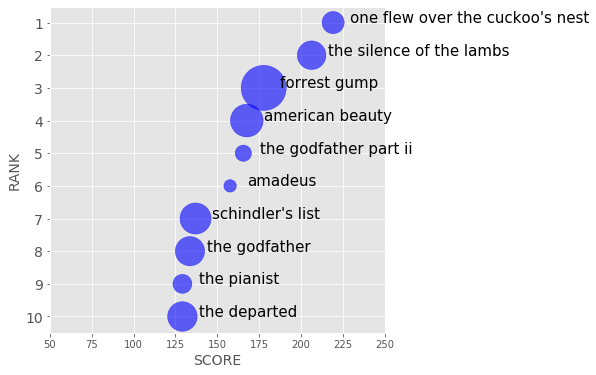

In [15]:

df = pd.read_csv('my_data_4/DF_MEGA.csv')
df = pd.merge(df_movies_oscars_pre_post_score, df_movies)
df1 = df.sort_values(by="imdb_rating", ascending=False)
df1.head()

df2 = df.sort_values(by="postscore", ascending=False)
df2.head()
N = 2000
df3 = pd.merge(df1.head(N),df2.head(N)).query("postscore > 12")
df3['result'] = df3.postscore*df3.imdb_rating
df2 = df3[['imdbID','title','year','postscore', 'imdb_rating','result']].head(10).sort_values(by='result', ascending=False)
x = plot_n_sort(df2, 10, size_factor = 3, fontsize=14, figsize = (6,6))
x.sort_values(by = 'result', ascending=False).head(5)



### The Most Successful Academy  Awards Since 1960s

In [16]:
df = df_movies_oscars_pre_post_score
df = df[df.year>=1960]
print(df.shape)
df.sort_values(by='postscore', ascending=False).head(10)

(4770, 5)


,imdbID,title,year,prescore,postscore
873,tt0073486,one flew over the cuckoo's nest,1975,0.6,25.20
1262,tt0079417,kramer vs. kramer,1979,1.0,24.20
479,tt0102926,the silence of the lambs,1991,5.2,24.00
1246,tt0086425,terms of endearment,1983,6.8,23.00
267,tt1504320,the king's speech,2010,5.6,20.45
454,tt0138097,shakespeare in love,1998,5.0,20.40
2698,tt0060665,a man for all seasons,1966,11.6,20.40
618,tt0405159,million dollar baby,2004,20.8,20.30
4714,tt0067116,the french connection,1971,0.2,20.25
131,tt0109830,forrest gump,1994,8.3,20.20


## Relation Between IMDB Ratings and Oscar Score

Correlation with Prescore:
             imdb_rating  prescore
imdb_rating      1.00000  -0.04207
prescore        -0.04207   1.00000


Correlation with Postscore:
             imdb_rating  postscore
imdb_rating     1.000000   0.390823
postscore       0.390823   1.000000


Correlation with Postscore:
           prescore  postscore
prescore   1.000000  -0.021927
postscore -0.021927   1.000000

Correlation nearly doubles with postscore


(0, 50)

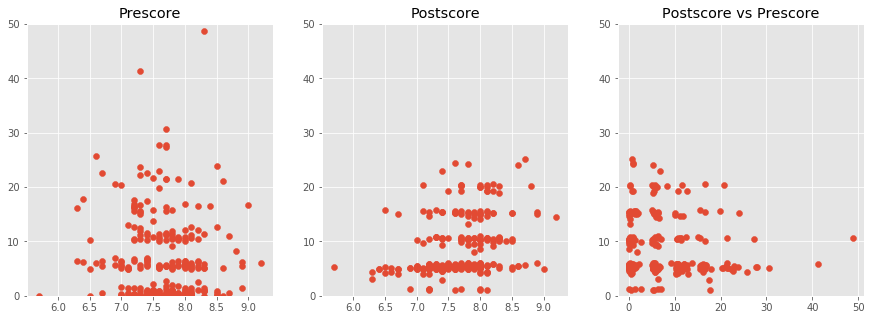

In [17]:
df = pd.read_csv('my_data_4/DF_MEGA.csv')
df = df[df.postscore>1]
df.columns
print('Correlation with Prescore:')
print(df[['imdb_rating','prescore']].corr(method= 'spearman'))
print('\n')
print('Correlation with Postscore:')
print(df[['imdb_rating','postscore']].corr(method= 'spearman'))
print('\n')
print('Correlation with Postscore:')
print(df[['prescore','postscore']].corr(method= 'spearman'))

print('\nCorrelation nearly doubles with postscore')

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df.imdb_rating, df.prescore)
plt.title('Prescore')
plt.ylim([0,50])

plt.subplot(1,3,2)
plt.scatter(df.imdb_rating, df.postscore)
plt.title('Postscore')
plt.ylim([0,50])

plt.subplot(1,3,3)
plt.scatter(df.prescore, df.postscore)
plt.title('Postscore vs Prescore')
plt.ylim([0,50])

# Budget and Box office Information

In [37]:
df_movies_main = pd.read_csv('my_data_4/DF_MEGA.csv',index_col=[0])
df_movies_main.columns

Index(['imdbID', 'title', 'year', 'n_votes', 'imdb_rating', 'budget',
       'box_office', 'cast', 'genre', 'running_time', 'inflation_factor',
       'budget_adjusted', 'budget_per_actor', 'budget_per_time',
       'runtime_per_actor', 'percent_revenue', 'total_ratings', 'book', 'sup',
       'hor', 'com', 'spy', 'his', 'war', 'psy', 'rom', 'mon', 'fan', 'mus',
       'pol', 'bio', 'sci', 'act', 'dra', 'dis', 'adv', 'mys', 'thr', 'dys',
       'cri', 'epi', 'oth', 'ani', 'based_on_book', 'other', 'prescore',
       'postscore', 'precount_wins', 'precount_noms', 'win', 'nom', 'none'],
      dtype='object')

In [39]:
df_movies_main = df_movies_main[df_movies_main.win > 0]


Text(0, 0.5, 'BOX OFFICE')

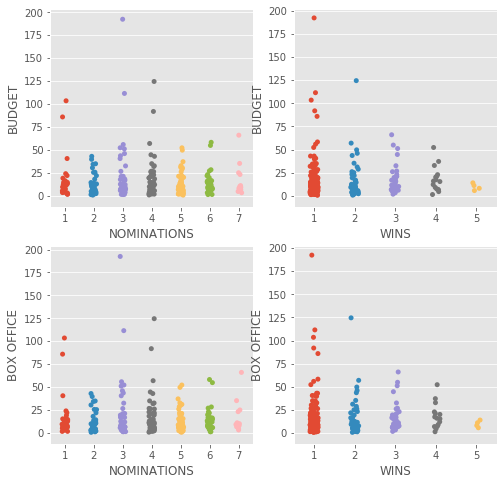

In [68]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.stripplot(x='nom', y='budget_adjusted', data=df_movies_main, size=5,jitter=True)
plt.xlabel('NOMINATIONS')
plt.ylabel('BUDGET')

plt.subplot(2,2,2)
sns.stripplot(x='win', y='budget_adjusted', data=df_movies_main, size=5,jitter=True)
plt.xlabel('WINS')
plt.ylabel('BUDGET')

plt.subplot(2,2,3)
sns.stripplot(x='nom', y='budget_adjusted', data=df_movies_main, size=5,jitter=True)
plt.xlabel('NOMINATIONS')
plt.ylabel('BOX OFFICE')

plt.subplot(2,2,4)
sns.stripplot(x='win', y='budget_adjusted', data=df_movies_main, size=5,jitter=True)
plt.xlabel('WINS')
plt.ylabel('BOX OFFICE')


Text(0, 0.5, 'IMDB SCORE')

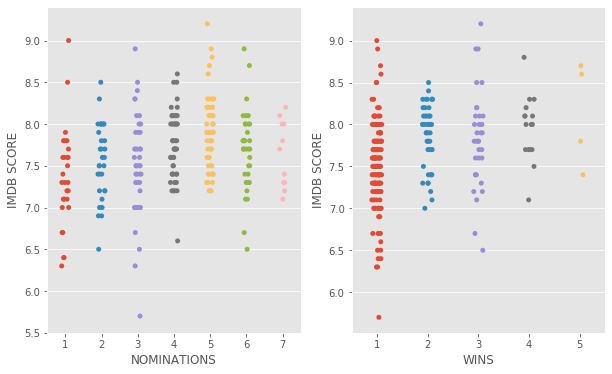

In [69]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.stripplot(x='nom', y='imdb_rating', data=df_movies_main, size=5,jitter=True)
plt.xlabel('NOMINATIONS')
plt.ylabel('IMDB SCORE')

plt.subplot(1,2,2)
sns.stripplot(x='win', y='imdb_rating', data=df_movies_main, size=5,jitter=True)
plt.xlabel('WINS')
plt.ylabel('IMDB SCORE')


Text(0, 0.5, 'IMDB SCORE')

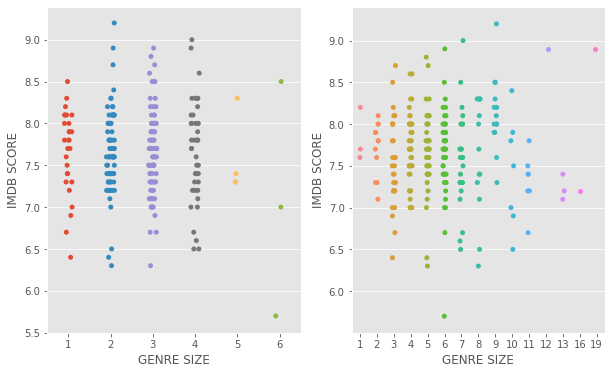

In [71]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.stripplot(x='genre', y='imdb_rating', data=df_movies_main, size=5,jitter=True)
plt.xlabel('GENRE SIZE')
plt.ylabel('IMDB SCORE')

plt.subplot(1,2,2)
sns.stripplot(x='cast', y='imdb_rating', data=df_movies_main, size=5,jitter=True)
plt.xlabel('CAST SIZE')
plt.ylabel('IMDB SCORE')

Text(0, 0.5, 'BUDGET')

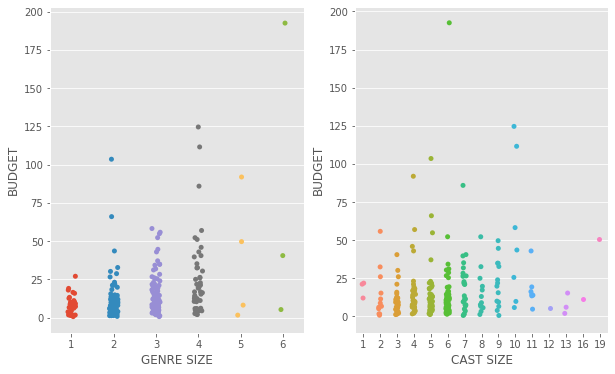

In [72]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.stripplot(x='genre', y='budget_adjusted', data=df_movies_main, size=5,jitter=True)
plt.xlabel('GENRE SIZE')
plt.ylabel('BUDGET')

plt.subplot(1,2,2)
sns.stripplot(x='cast', y= 'budget_adjusted', data=df_movies_main, size=5,jitter=True)
plt.xlabel('CAST SIZE')
plt.ylabel('BUDGET')

In [ ]:
gm